# 1. Importing Libraries

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy as sp
import seaborn as sns
sns.set(color_codes = True)
sns.set(style="darkgrid")
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.feature_selection import RFE,RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  auc
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier
import math
import time

# 2. Creating PyDrive to read data

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html

In [0]:
file_list = drive.ListFile({'q': "'18tRWHCQrQ2ZuOX_Sfg_vdq19j91YPOAT' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Prediction.ipynb, id: 1IS6RissG_Bs6eUcz6jCA4FPBA25rElLB
title: Capstone Project (Blackcat Data)- Cardiovascular disease - EDA.ipynb, id: 1fLVMskMc9FNlnrW4gPg1T3B6jqyxm6Bb
title: cardio.csv, id: 1vQeNK5FJeuKRiz4kmSLZu8zZKpA62RiY
title: Presentation - Ruchita Manuja, id: 1npRoewPwXyOFtyyPRjneI72i97iTTw2HgXKKkakGs8g
title: Cardio_cleaned.csv, id: 11gu9WaxbwcpebX81EFfDmonMlKHKzK64


In [0]:
training_data_downloaded = drive.CreateFile({'id': '11gu9WaxbwcpebX81EFfDmonMlKHKzK64'})
training_data_downloaded.GetContentFile('Cardio_cleaned.csv')

# 3. Data Import and Exploration

In [0]:
df = pd.read_csv('Cardio_cleaned.csv')

In [0]:
df.shape

(65081, 14)

In [0]:
df.head()

,Unnamed: 0,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,4,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177


In [0]:
df.drop(columns = ['Unnamed: 0'],inplace=True)

In [0]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,BMI
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177


In [0]:
df.dtypes

gender            int64
height            int64
weight          float64
ap_hi             int64
ap_lo             int64
cholesterol       int64
gluc              int64
smoke             int64
alco              int64
active            int64
cardio            int64
age_in_years    float64
BMI             float64
dtype: object

In [0]:
#Converting Categorical variables to Category Datatype
for col in ['gender','cholesterol','gluc','smoke','alco','active','cardio']:
    df[col] = df[col].astype('category')

In [0]:
df.dtypes

gender          category
height             int64
weight           float64
ap_hi              int64
ap_lo              int64
cholesterol     category
gluc            category
smoke           category
alco            category
active          category
cardio          category
age_in_years     float64
BMI              float64
dtype: object

In [0]:
#Seperating our explanatory and target variables
X = df.drop(columns = ['cardio','weight','height'])
y = df['cardio']

In [0]:
categorical_df = pd.DataFrame(X[['gender','cholesterol','gluc','smoke','alco','active']])
continuous_df = pd.DataFrame(X[['ap_hi','ap_lo','age_in_years','BMI']])

In [0]:
categorical_df.head()

,gender,cholesterol,gluc,smoke,alco,active
0,2,1,1,0,0,1
1,1,3,1,0,0,1
2,1,3,1,0,0,0
3,2,1,1,0,0,1
4,1,1,1,0,0,0


In [0]:
continuous_df.head()

,ap_hi,ap_lo,age_in_years,BMI
0,110,80,50.0,21.967120
1,140,90,55.0,34.927679
2,130,70,52.0,23.507805
3,150,100,48.0,28.710479
4,100,60,48.0,23.011177


# 4. Data Preprocessing

## 4.1 Onehot Encoding (Categorical Data)

In [0]:
#One hot encoding
categorical_df_onehot = pd.get_dummies(categorical_df,drop_first=True)

In [0]:
categorical_df_onehot.head()

,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1
0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0


In [0]:
categorical_df_onehot.dtypes

gender_2         uint8
cholesterol_2    uint8
cholesterol_3    uint8
gluc_2           uint8
gluc_3           uint8
smoke_1          uint8
alco_1           uint8
active_1         uint8
dtype: object

In [0]:
# Splitting the dataset into Training and testing subsets before standardization for RF
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = 0.3,random_state = 42)

## 4.2  Standardization & Normalization (Feature Scaling)

In [0]:
scaler = StandardScaler()

In [0]:
continuous_df_scaled = pd.DataFrame(scaler.fit_transform(continuous_df),columns=continuous_df.columns)

In [0]:
continuous_df_scaled.shape

(65081, 4)

In [0]:
continuous_df_scaled.isnull().sum()

ap_hi           0
ap_lo           0
age_in_years    0
BMI             0
dtype: int64

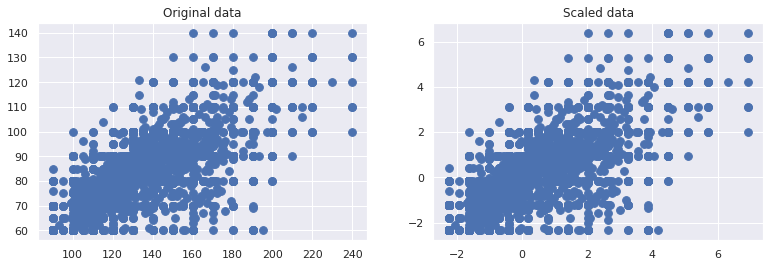

In [151]:
#plotting the original vs scaled data
fig,axes = plt.subplots(1,2, figsize = (13,4))
axes[0].scatter(continuous_df .iloc[:,0],continuous_df .iloc[:,1], s=60) 
axes[0].set_title("Original data")
axes[1].scatter(continuous_df_scaled.iloc[:,0],continuous_df_scaled.iloc[:,1], s=60) 
axes[1].set_title("Scaled data")
plt.show()

Our Original and Scaled data look the same when plotted 

## 4.3 Joining the data (Categorical with dummies & scaled continous data)

In [0]:
#Scaled Dataframe
X_new = categorical_df_onehot.join(continuous_df_scaled)
X_new.head()

,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1,ap_hi,ap_lo,age_in_years,BMI
0,1,0,0,0,0,0,0,1,-1.020881,-0.148802,-0.497989,-1.223342
1,0,0,1,0,0,0,0,1,0.812689,0.938260,0.242538,1.774434
2,0,0,1,0,0,0,0,0,0.201499,-1.235865,-0.201778,-0.866982
3,1,0,0,0,0,0,0,1,1.423879,2.025323,-0.794199,0.336396
4,0,0,0,0,0,0,0,0,-1.632071,-2.322928,-0.794199,-0.981852


In [0]:
X_new.shape

(65081, 12)

In [0]:
X_new.isnull().sum()

gender_2         0
cholesterol_2    0
cholesterol_3    0
gluc_2           0
gluc_3           0
smoke_1          0
alco_1           0
active_1         0
ap_hi            0
ap_lo            0
age_in_years     0
BMI              0
dtype: int64

In [0]:
X_new.dtypes

gender_2           uint8
cholesterol_2      uint8
cholesterol_3      uint8
gluc_2             uint8
gluc_3             uint8
smoke_1            uint8
alco_1             uint8
active_1           uint8
ap_hi            float64
ap_lo            float64
age_in_years     float64
BMI              float64
dtype: object

In [0]:
#Normalized Dataframe
X_norm = categorical_df_onehot.join(continuous_df_minmax)
X_norm.head()

,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_1,alco_1,active_1,ap_hi,ap_lo,age_in_years,BMI
0,1,0,0,0,0,0,0,1,0.133333,0.250,0.571429,0.102959
1,0,0,1,0,0,0,0,1,0.333333,0.375,0.714286,0.742037
2,0,0,1,0,0,0,0,0,0.266667,0.125,0.628571,0.178929
3,1,0,0,0,0,0,0,1,0.400000,0.500,0.514286,0.435470
4,0,0,0,0,0,0,0,0,0.066667,0.000,0.514286,0.154441


In [0]:
X_norm.isnull().sum()

gender_2         0
cholesterol_2    0
cholesterol_3    0
gluc_2           0
gluc_3           0
smoke_1          0
alco_1           0
active_1         0
ap_hi            0
ap_lo            0
age_in_years     0
BMI              0
dtype: int64

In [0]:
X_norm.shape

(65081, 12)

## 4.4 Splitting Data for Modelling 

In [0]:
# Splitting the dataset into Training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3,random_state = 42)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size = 0.3,random_state = 42)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(45556, 12)
(19525, 12)
(45556,)
(19525,)
(45556, 12)
(19525, 12)
(45556,)
(19525,)


# 5. Modelling

## 5.1 K- Nearest Neighbour Classifier 

In [0]:
param_grid = {'n_neighbors': np.arange(1, 50),'weights': ['uniform','distance'],'metric': ['euclidean','manhattan','minkowski']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
knn_cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 49, 'weights': 'uniform'}

In [0]:
knn_cv.best_score_

0.7286416717885679

In [0]:
knn = KNeighborsClassifier(n_neighbors=49,metric='euclidean',weights= 'uniform')
scores_knn = cross_val_score(knn, X_train, y_train, cv=10)
scores_knn

array([0.71927129, 0.72739245, 0.72936787, 0.73419666, 0.73419666,
       0.72036874, 0.73172338, 0.72008782, 0.72886937, 0.74094402])

In [0]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

Accuracy: 0.73 (+/- 0.01)


In [0]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [0]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=49,metric='euclidean',weights= 'uniform')
knn.fit(X_train,y_train)
knn_y_pred = cross_val_predict(knn, X_test,y_test ,cv=10)
print('accuracy_score--',accuracy_score(y_test,knn_y_pred))
#print('-' * 60)
print('Classification_report')
print(classification_report(y_test,knn_y_pred))
print('runtime',np.round(time.time() - start,2),'sec')

accuracy_score-- 0.7208194622279129
Classification_report
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      9838
           1       0.75      0.66      0.70      9687

    accuracy                           0.72     19525
   macro avg       0.72      0.72      0.72     19525
weighted avg       0.72      0.72      0.72     19525

runtime 4.08 sec


In [0]:
print(confusion_matrix(y_test,knn_y_pred))

[[7635 2203]
 [3248 6439]]


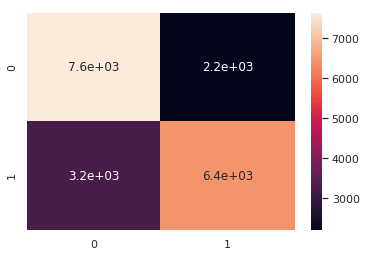

In [0]:
#['TN' 'FP']
#['FN' 'TP']
sns.heatmap(confusion_matrix(y_test,knn_y_pred),annot=True)
plt.show()

In [0]:
accuracy_score(y_test,knn_y_pred)

0.7208194622279129

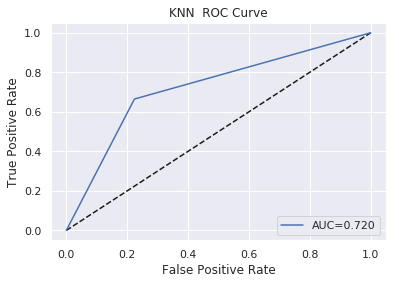

In [0]:
knn_y_pred_prob = knn.predict_proba(X_test)[:,1]
fprk, tprk, thresholds_knn = roc_curve(y_test,knn_y_pred)
auc_KNN = roc_auc_score(y_test,knn_y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprk, tprk,label="AUC=%.3f" %auc_KNN)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN  ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 5.2  Logistic Regression

In [0]:
params = {'C':[0.0001,0.001,0.01,1.0,10,100,1000],'solver':['liblinear','sag','saga']}
lr=LogisticRegression(penalty='l2',n_jobs=1)
lr_cv = GridSearchCV(lr,param_grid=params,cv=10,n_jobs=1) 
lr_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=1, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.01, 1.0, 10, 100, 1000],
                         'solver': ['liblinear', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
lr_cv.best_params_

{'C': 1.0, 'solver': 'liblinear'}

In [0]:
lr_cv.best_score_

0.7265343752743876

In [0]:
lr = LogisticRegressionCV(Cs = 1,penalty='l2',n_jobs=1,solver='liblinear',cv=10)
scores_lr = cross_val_score(lr, X_train, y_train, cv=10)
scores_lr

array([0.71619842, 0.71729587, 0.71575944, 0.71773486, 0.72541703,
       0.71027217, 0.71811196, 0.70976948, 0.71920966, 0.72645445])

In [0]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lr.mean(), scores_lr.std() * 2))

Accuracy: 0.72 (+/- 0.01)


In [0]:
lr.fit(X_train,y_train)

LogisticRegressionCV(Cs=1, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=1, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [0]:
start = time.time()
lr = LogisticRegressionCV(Cs = 1,penalty='l2',n_jobs=1,solver='liblinear',cv=10)
lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_test)
print('accuracy_score--',accuracy_score(y_test,lr_y_pred))
print('Classification_report')
print(classification_report(y_test,lr_y_pred))
print('runtime',np.round(time.time() - start,2),'sec')

accuracy_score-- 0.7132906530089629
Classification_report
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      9838
           1       0.74      0.65      0.69      9687

    accuracy                           0.71     19525
   macro avg       0.72      0.71      0.71     19525
weighted avg       0.72      0.71      0.71     19525

runtime 0.84 sec


In [0]:
print(confusion_matrix(y_test,lr_y_pred))

[[7588 2250]
 [3348 6339]]


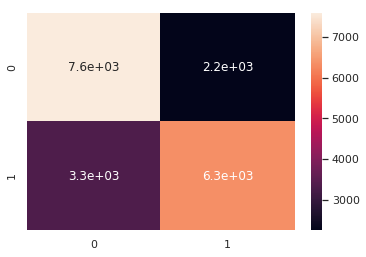

In [0]:
#['TN' 'FP']
#['FN' 'TP']
sns.heatmap(confusion_matrix(y_test,lr_y_pred),annot=True)
plt.show()

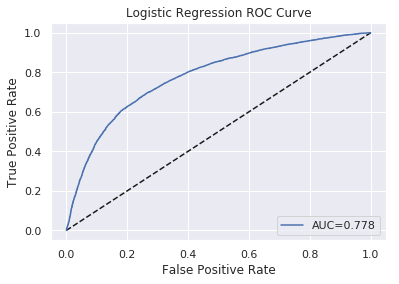

In [0]:
y_pred_prob = lr.predict_proba(X_test)[:,1]
fprl, tprl, thresholds = roc_curve(y_test, y_pred_prob)
auc_LR = roc_auc_score(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprl, tprl, label="AUC=%.3f" %auc_LR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

##5.3  Naive Bayes

In [0]:
nb = GaussianNB()
scores_nb = cross_val_score(nb, X_train, y_train, cv=10)
scores_nb

array([0.68634767, 0.68744513, 0.69139596, 0.69446883, 0.70171203,
       0.69249342, 0.70010977, 0.69132821, 0.69769484, 0.70559824])

In [0]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_nb.mean(), scores_nb.std() * 2))

Accuracy: 0.69 (+/- 0.01)


In [0]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
start = time.time()
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_y_pred = cross_val_predict(nb, X_test,y_test ,cv=10)
print('accuracy_score--',accuracy_score(y_test,nb_y_pred))
print('Classification_report')
print(classification_report(y_test,nb_y_pred))
print('runtime',np.round(time.time() - start,2),'sec')

accuracy_score-- 0.6929065300896287
Classification_report
              precision    recall  f1-score   support

           0       0.66      0.80      0.72      9838
           1       0.74      0.58      0.65      9687

    accuracy                           0.69     19525
   macro avg       0.70      0.69      0.69     19525
weighted avg       0.70      0.69      0.69     19525

runtime 0.15 sec


In [0]:
print(confusion_matrix(y_test,nb_y_pred))

[[7891 1947]
 [4049 5638]]


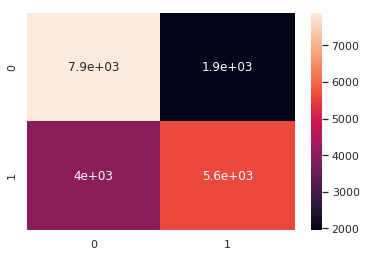

In [0]:

sns.heatmap(confusion_matrix(y_test,nb_y_pred),annot=True)
plt.show()

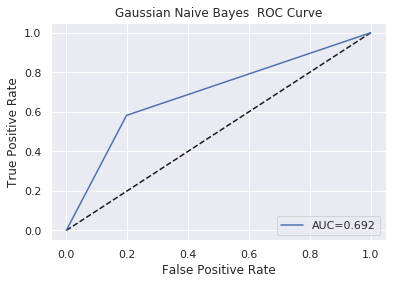

In [0]:
nb_y_pred_prob = nb.predict_proba(X_test)[:,1]
fprb, tprb, thresholds_nb = roc_curve(y_test,nb_y_pred)
auc_nb = roc_auc_score(y_test,nb_y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprb, tprb,label="AUC=%.3f" %auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes  ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 5.4  Random Forest

In [0]:
#Random Forest Before Tuning 
start = time.time()
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf_pred = cross_val_predict(rf, X_test,y_test ,cv=10)
print('accuracy_score--',accuracy_score(y_test, rf_pred))
print('Classification_report')
print(classification_report(y_test,rf_pred))
print('runtime',np.round(time.time() - start,2),'sec')

accuracy_score-- 0.6766709346991037
Classification_report
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      9838
           1       0.68      0.65      0.66      9687

    accuracy                           0.68     19525
   macro avg       0.68      0.68      0.68     19525
weighted avg       0.68      0.68      0.68     19525

runtime 2.73 sec


In [0]:
print(confusion_matrix(y_test,rf_pred))


[[6955 2883]
 [3430 6257]]


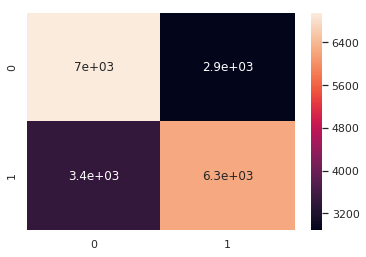

In [0]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True)
plt.show()

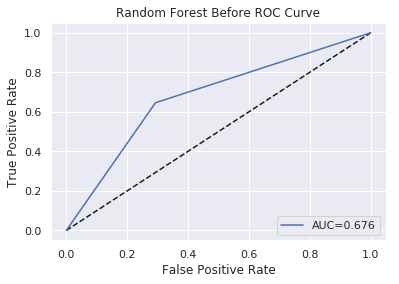

In [0]:
rf_pred_prob = rf.predict_proba(X_test)[:,1]
fprrf, tprrf, thresholds_rf= roc_curve(y_test,rf_pred)
auc_rf = roc_auc_score(y_test,rf_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprrf, tprrf,label="AUC=%.3f" %auc_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Before ROC Curve')
plt.legend(loc="lower right")
plt.show()

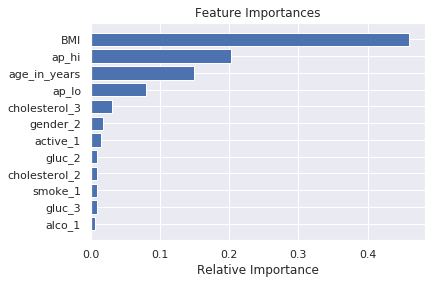

In [0]:
features = X_new.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Finding the right parameters 

#### n_estimators
n_estimators represents the number of trees in the forest

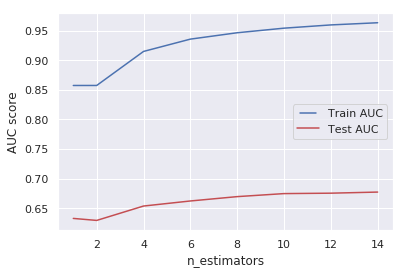

In [0]:
#Finding the right n_estimators
n_estimators = [1,2,4,6,8,10,12,14]
train_results = []
test_results = []
for estimator in n_estimators:
  rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1,random_state = 100)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred = rf.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

We see that the performance on the test data remains the same after 10.

#### max_depth
max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. 

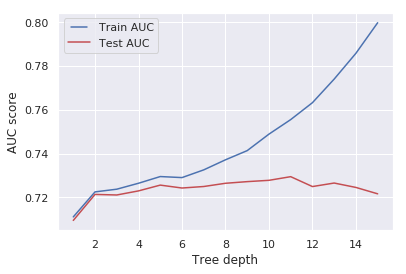

In [0]:
#fiting each decision tree with depths ranging from 1 to 15 and plot the training and test errors.
max_depths = np.linspace(1, 15, 15, endpoint=True) 
train_results = []
test_results = []
for max_depth in max_depths:
  rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1,random_state = 75)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred = rf.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

Model is overfitting for large depth values. A depth value of 11 would be ideal as the test performance is reducing after that

#### max_features
max_features represents the number of features to consider when looking for the best split.

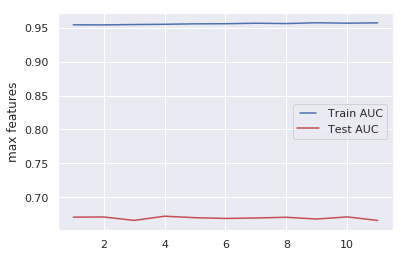

In [0]:
max_features = list(range(1,X_new.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
  rf = RandomForestClassifier(max_features=max_feature,random_state = 85)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred = rf.predict(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('max features')
plt.show()

Lets go with 8 as the test performance is reducing afterwards

Our chosen Parameters are: 

*  **n_estimators:** above 10 
*   **max_depth:** 11
*  **max_features:** 8









### After Tuning

In [0]:
rf2=RandomForestClassifier(n_estimators = 10, max_features = 8,max_depth = 11)
params = {'criterion':['gini','entropy'] ,'min_samples_split': np.arange(2, 11),'min_samples_leaf': np.arange(2, 11)}
rf2grid = GridSearchCV(rf2,param_grid=params,cv=10,refit=True)
rf2grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=11,
                                              max_features=8,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn', n

In [0]:
rf2grid.best_params_

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 9}

In [0]:
rf2grid.best_score_

0.7332074809026253

In [0]:
#Random Forest After Tuning 
start = time.time()
rf2 = RandomForestClassifier(n_estimators = 10, max_depth = 11, max_features = 8,criterion = 'gini',min_samples_leaf =  10 ,min_samples_split = 9 ,random_state = 42)
rf2.fit(X_train, y_train)
rf2_pred = cross_val_predict(rf2, X_test,y_test ,cv=10)
print('accuracy_score--',accuracy_score(y_test, rf2_pred))
print('Classification_report')
print(classification_report(y_test,rf2_pred))
print('runtime',np.round(time.time() - start,2),'sec')

accuracy_score-- 0.7251216389244558
Classification_report
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      9838
           1       0.75      0.68      0.71      9687

    accuracy                           0.73     19525
   macro avg       0.73      0.72      0.72     19525
weighted avg       0.73      0.73      0.72     19525

runtime 2.54 sec


In [0]:
print(confusion_matrix(y_test,rf2_pred))

[[7602 2236]
 [3131 6556]]


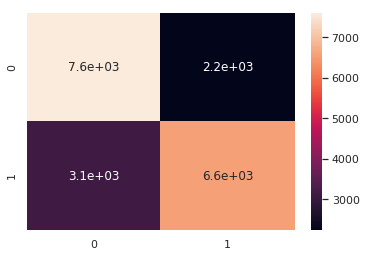

In [0]:
sns.heatmap(confusion_matrix(y_test,rf2_pred),annot=True)
plt.show()

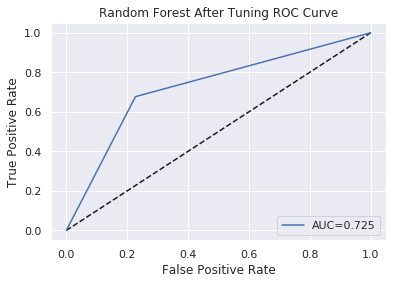

In [0]:
rf2_pred_prob = rf2.predict_proba(X_test)[:,1]
fprrf2, tprrf2, thresholds_rf2 = roc_curve(y_test,rf2_pred)
auc_rf2 = roc_auc_score(y_test,rf2_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprrf2, tprrf2,label="AUC=%.3f" %auc_rf2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest After Tuning ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### Classifier Performance Comparision 

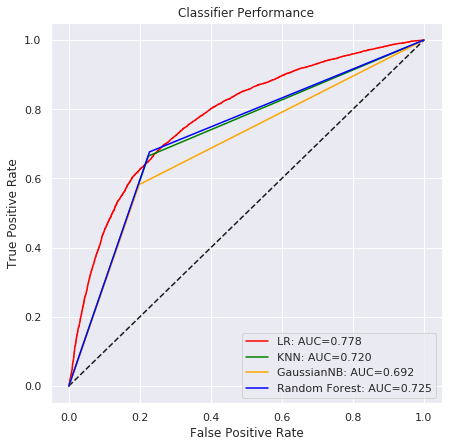

In [0]:
plt.figure(figsize=(7,7))
#Plotting TPR and FPR 
fprk, tprk, thresholds_knn = roc_curve(y_test,knn_y_pred)
fprl, tprl, thresholds = roc_curve(y_test, y_pred_prob)
fprb, tprb, thresholds_nb = roc_curve(y_test,nb_y_pred)
fprrf2, tprrf2, thresholds_rf2 = roc_curve(y_test,rf2_pred)
#AUC
auc_KNN = roc_auc_score(y_test,knn_y_pred)
auc_LR = roc_auc_score(y_test, y_pred_prob)
auc_nb = roc_auc_score(y_test,nb_y_pred)
auc_rf2 = roc_auc_score(y_test,rf2_pred)                                           
#Threshold line 
plt.plot([0, 1], [0, 1], 'k--')
#Classifier ROC curves
plt.plot(fprl, tprl, color = 'red',label="LR: AUC=%.3f" %auc_LR)
plt.plot(fprk, tprk, color = 'green',label="KNN: AUC=%.3f" %auc_KNN)
plt.plot(fprb, tprb, color = 'orange',label="GaussianNB: AUC=%.3f" %auc_nb)
plt.plot(fprrf2, tprrf2, color = 'blue', label="Random Forest: AUC=%.3f" %auc_rf2)  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifier Performance')
plt.legend(loc="lower right")
plt.show()

We see our Logistic Regression model has the largest AUC of 77.8%, therefore we can conclude that Logistic Regression is better classifier for data